# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [9]:
sinasc_raw = pd.read_csv('https://raw.githubusercontent.com/caprica-code/mod_09_ex_01/refs/heads/main/SINASC_RO_2019.csv')
sinasc_raw.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [40]:
# Criar coluna com a faixa de latitude
sinasc_raw['faixa_latitude'] = np.where(sinasc_raw['munResLat'] > -10.5, 'Acima de -10.5', 'Abaixo de -10.5')

# Escolher duas variáveis numéricas que ainda não foram usadas
variaveis_numericas1 = ['IDADEMAE', 'PESO']  

# Realizar o groupby com as agregações
resultado1 = sinasc_raw.groupby('faixa_latitude')[variaveis_numericas1].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


resultado1

IDADEMAE                                                 \
                     sum       mean min max median       std        var   
faixa_latitude                                                            
Abaixo de -10.5   340167  26.178775  12  53   26.0  6.320171  39.944563   
Acima de -10.5    365094  26.014964  11  52   25.0  6.447663  41.572355   

                     PESO                                              \
                      sum         mean  min   max  median         std   
faixa_latitude                                                          
Abaixo de -10.5  42101809  3240.096121  258  5985  3270.0  531.794694   
Acima de -10.5   45555148  3246.055864  295  5190  3275.0  556.487709   

                                
                           var  
faixa_latitude                  
Abaixo de -10.5  282805.596163  
Acima de -10.5   309678.570242

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [46]:
# Criar coluna com a faixa de Area
sinasc_raw['area_municipio'] = np.where(sinasc_raw['munResArea'] > 3000, 'Acima de 3000', 'Abaixo de 3000')

# Escolher duas variáveis numéricas que ainda não foram usadas
variaveis_numericas2 = ['ESTCIVMAE', 'CONTADOR']  
  
# Realizar o groupby com as agregações
resultado2 = sinasc_raw.groupby('area_municipio')[variaveis_numericas2].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

resultado2

ESTCIVMAE                                                 \
                     sum      mean  min  max median       std       var   
area_municipio                                                            
Abaixo de 3000   13345.0  2.579242  1.0  9.0    2.0  1.582636  2.504738   
Acima de 3000    54643.0  2.537169  1.0  9.0    2.0  1.691778  2.862114   

                   CONTADOR                                       \
                        sum           mean min      max   median   
area_municipio                                                     
Abaixo de 3000   3861432042  739737.939080   7  2780269  13442.5   
Acima de 3000   16051851799  736053.365691   1  2777105  13668.5   

                                             
                          std           var  
area_municipio                               
Abaixo de 3000  741913.674510  5.504359e+11  
Acima de 3000   743315.254071  5.525176e+11

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [56]:
sorted(sinasc_raw['munResAlt'].unique().tolist())

[85.0,
 87.0,
 99.0,
 111.0,
 124.0,
 128.0,
 133.0,
 139.0,
 144.0,
 145.0,
 151.0,
 153.0,
 154.0,
 155.0,
 157.0,
 158.0,
 161.0,
 163.0,
 166.0,
 170.0,
 177.0,
 178.0,
 182.0,
 186.0,
 191.0,
 192.0,
 197.0,
 202.0,
 206.0,
 212.0,
 215.0,
 227.0,
 230.0,
 236.0,
 241.0,
 245.0,
 252.0,
 259.0,
 263.0,
 265.0,
 266.0,
 269.0,
 270.0,
 296.0,
 338.0,
 340.0,
 397.0,
 419.0,
 595.0,
 nan]

In [58]:
# Criar coluna com a faixa de Area
sinasc_raw['altitude_municipio'] = np.where(sinasc_raw['munResAlt'] > 200, 'Acima de 200', 'Abaixo de 200')

# Escolher duas variáveis numéricas que ainda não foram usadas
variaveis_numericas3 = ['KOTELCHUCK', 'CODOCUPMAE']  
  
# Realizar o groupby com as agregações
resultado3 = sinasc_raw.groupby('altitude_municipio')[variaveis_numericas3].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

resultado3

KOTELCHUCK                                               \
                          sum      mean min max median       std       var   
altitude_municipio                                                           
Abaixo de 200          106209  5.099337   1   9    5.0  2.201776  4.847816   
Acima de 200            28254  4.557097   1   9    5.0  1.454354  2.115146   

                      CODOCUPMAE                                              \
                             sum           mean      min       max    median   
altitude_municipio                                                             
Abaixo de 200       1.495596e+10  807426.244993  10205.0  999994.0  999992.0   
Acima de 200        4.234809e+09  756485.978921  21205.0  999994.0  999991.0   

                                                 
                              std           var  
altitude_municipio                               
Abaixo de 200       281959.633755  7.950124e+10  
Acima de 200        286735.534521  8.221727e+10

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [15]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

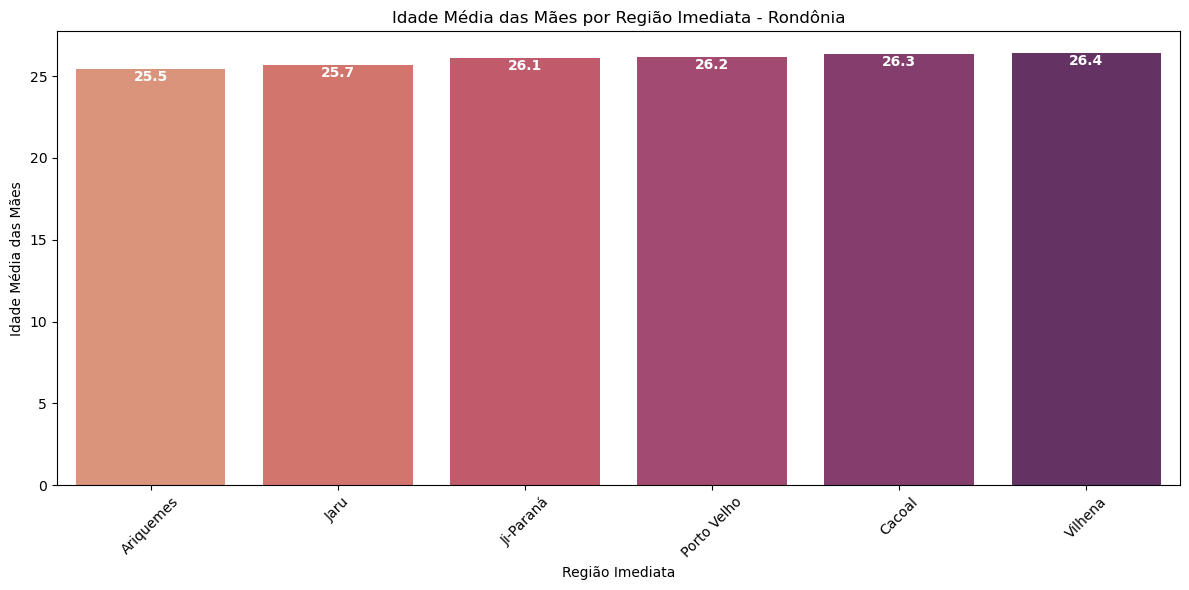

In [94]:
plt.figure(figsize=(12, 6))  # Define o tamanho da figura (12 de largura x 6 de altura)

# Cria o gráfico de barras com paleta 'viridis' e guarda o objeto do gráfico em 'ax'
ax = sns.barplot(
    x=media_idade.index,  # No eixo X, as regiões imediatas
    y=media_idade.values,  # No eixo Y, as idades médias
    hue=media_idade.index,  # adiciona hue para que o palette funcione
    palette='flare',  
    dodge=False,  # para não separar as barras
    legend=False  # remove a legenda (opcional)
)

# Loop para adicionar o número de cada barra dentro da própria barra
for p in ax.patches:  # Para cada barra desenhada (cada 'retângulo' ou 'patch')
    altura = p.get_height()  # Obtém a altura da barra, que é o valor da idade média
    ax.text(
        p.get_x() + p.get_width() / 2.,  # Posição horizontal: meio da barra
        altura - 0.5,  # Posição vertical: um pouco abaixo do topo, para ficar dentro da barra
        f'{altura:.1f}',  # Texto: valor da altura com 1 casa decimal
        ha='center',  # Alinhamento horizontal: centro
        va='center',  # Alinhamento vertical: centro
        color='white',  # Cor do texto: branco, para destacar na cor da barra
        fontsize=10,  # Tamanho da fonte
        fontweight='bold'  # Peso da fonte: negrito
    )

# Define o nome do eixo X
plt.xlabel('Região Imediata')

# Define o nome do eixo Y
plt.ylabel('Idade Média das Mães')

# Define o título do gráfico
plt.title('Idade Média das Mães por Região Imediata - Rondônia')

# Rotaciona os nomes no eixo X para 45 graus, para evitar que fiquem sobrepostos
plt.xticks(rotation=45)

# Ajusta automaticamente o layout para evitar cortes nos elementos
plt.tight_layout()

# Mostra o gráfico na tela
plt.show()


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [205]:
idh_dict = {
    'Alta Floresta Do Oeste': 'Médio',
    'Alto Alegre dos Parecis': 'Baixo',
    'Alto Paraíso': 'Baixo',
    'Alvorada Do Oeste': 'Baixo',
    'Ariquemes': 'Alto',
    'Buritis': 'Médio',
    'Cabixi': 'Baixo',
    'Cacaulândia': 'Baixo',
    'Cacoal': 'Alto',
    'Campo Novo de Rondônia': 'Baixo',
    'Candeias do Jamari': 'Médio',
    'Castanheiras': 'Baixo',
    'Cerejeiras': 'Médio',
    'Chupinguaia': 'Médio',
    'Colorado do Oeste': 'Médio',
    'Corumbiara': 'Baixo',
    'Costa Marques': 'Baixo',
    'Cujubim': 'Baixo',
    'Espigão Do Oeste': 'Baixo',
    'Governador Jorge Teixeira': 'Muito Baixo',
    'Guajará-Mirim': 'Baixo',
    'Itapuã do Oeste': 'Baixo',
    'Jaru': 'Alto',
    'Ji-Paraná': 'Alto',
    'Machadinho Do Oeste': 'Baixo',
    'Ministro Andreazza': 'Baixo',
    'Mirante da Serra': 'Baixo',
    'Monte Negro': 'Médio',
    'Nova Brasilândia Do Oeste': 'Baixo',
    'Nova Mamoré': 'Baixo',
    'Nova União': 'Baixo',
    'Novo Horizonte do Oeste': 'Baixo',
    'Ouro Preto do Oeste': 'Alto',
    'Parecis': 'Baixo',
    'Pimenta Bueno': 'Alto',
    'Pimenteiras do Oeste': 'Médio',
    'Porto Velho': 'Alto',
    'Presidente Médici': 'Médio',
    'Primavera de Rondônia': 'Médio',
    'Rio Crespo': 'Médio',
    'Rolim de Moura': 'Alto',
    'Santa Luzia Do Oeste': 'Médio',
    'São Felipe Do Oeste': 'Médio',
    'São Francisco do Guaporé': 'Médio',
    'São Miguel do Guaporé': 'Médio',
    'Seringueiras': 'Baixo',
    'Teixeirópolis': 'Médio',
    'Theobroma': 'Baixo',
    'Urupá': 'Médio',
    'Vale do Anari': 'Baixo',
    'Vale do Paraíso': 'Baixo',
    'Vilhena': 'Alto'
}


In [157]:
# Criar DataFrame a partir do dicionário
df_idh = pd.DataFrame(list(idh_dict.items()), columns=['Municipio', 'Faixa_IDH'])

# Usar groupby para contar quantos municípios por faixa
contagem = df_idh.groupby('Faixa_IDH').size().reset_index(name='Qtd_Municipios')

# Ordenar por faixa (opcional, para ficar mais organizado)
contagem = contagem.sort_values('Faixa_IDH').reset_index(drop=True)

contagem

,Faixa_IDH,Qtd_Municipios
0,Alto,9
1,Baixo,25
2,Muito Baixo,1
3,Médio,17


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [207]:
faixa_ifdm_dict = {
    'Ariquemes': 'Moderado',
    'Vilhena': 'Moderado',
    'Pimenta Bueno': 'Moderado',
    'Porto Velho': 'Moderado',
    'Ji-Paraná': 'Moderado',
    'Cacoal': 'Moderado',
    'Santa Luzia do Oeste': 'Moderado',
    'Rolim de Moura': 'Moderado',
    'Chupinguaia': 'Moderado',
    'São Miguel do Guaporé': 'Moderado',
    'Pimenteiras do Oeste': 'Moderado',
    'Teixeirópolis': 'Moderado',
    'Colorado do Oeste': 'Moderado',
    'Jaru': 'Moderado',
    'Rio Crespo': 'Moderado',
    'Primavera de Rondônia': 'Moderado',
    'Alta Floresta do Oeste': 'Moderado',
    'Ouro Preto do Oeste': 'Moderado',
    'São Francisco do Guaporé': 'Moderado',
    'Candeias do Jamari': 'Moderado',
    'Buritis': 'Moderado',
    'São Felipe do Oeste': 'Moderado',
    'Presidente Médici': 'Moderado',
    'Cerejeiras': 'Moderado',
    'Monte Negro': 'Moderado',
    'Urupá': 'Moderado',
    'Espigão do Oeste': 'Regular',
    'Seringueiras': 'Regular',
    'Alvorada do Oeste': 'Regular',
    'Itapuã do Oeste': 'Regular',
    'Cabixi': 'Regular',
    'Novo Horizonte do Oeste': 'Regular',
    'Nova Brasilândia do Oeste': 'Regular',
    'Vale do Paraíso': 'Regular',
    'Corumbiara': 'Regular',
    'Alto Paraíso': 'Regular',
    'Cacaulândia': 'Regular',
    'Vale do Anari': 'Regular',
    'Ministro Andreazza': 'Regular',
    'Costa Marques': 'Regular',
    'Nova União': 'Regular',
    'Guajará-Mirim': 'Regular',
    'Mirante da Serra': 'Regular',
    'Parecis': 'Regular',
    'Castanheiras': 'Regular',
    'Theobroma': 'Regular',
    'Machadinho do Oeste': 'Regular',
    'Campo Novo de Rondônia': 'Regular',
    'Nova Mamoré': 'Regular',
    'Cujubim': 'Regular',
    'Alto Alegre dos Parecis': 'Regular',
    'Governador Jorge Teixeira': 'Regular'
}


In [189]:
# Criar DataFrame a partir do dicionário
df_ifdm = pd.DataFrame(list(faixa_ifdm_dict.items()), columns=['Municipio', 'Faixa_IFDM'])

# Usar groupby para contar quantos municípios por faixa
contagem2 = df_ifdm.groupby('Faixa_IFDM').size().reset_index(name='Qtd_Municipios')

# Ordenar por faixa (opcional, para ficar mais organizado)
contagem2 = contagem2.sort_values('Faixa_IFDM').reset_index(drop=True)

contagem2

,Faixa_IFDM,Qtd_Municipios
0,Moderado,26
1,Regular,26


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [199]:
faixa_pib_dict = {
    "Porto Velho": "Acima de 1 Bilhão",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Vilhena": "Acima de 1 Bilhão",
    "Ariquemes": "Acima de 1 Bilhão",
    "Cacoal": "Acima de 1 Bilhão",
    "Jaru": "Entre 500 Milhões e 1 Bilhão",
    "Rolim de Moura": "Entre 500 Milhões e 1 Bilhão",
    "Pimenta Bueno": "Entre 500 Milhões e 1 Bilhão",
    "Guajará-Mirim": "Entre 500 Milhões e 1 Bilhão",
    "Ouro Preto do Oeste": "Entre 500 Milhões e 1 Bilhão",
    "Espigão do Oeste": "Entre 200 Milhões e 500 Milhões",
    "Buritis": "Entre 200 Milhões e 500 Milhões",
    "Machadinho do Oeste": "Entre 200 Milhões e 500 Milhões",
    "São Miguel do Guaporé": "Entre 200 Milhões e 500 Milhões",
    "Candeias do Jamari": "Entre 200 Milhões e 500 Milhões",
    "Colorado do Oeste": "Entre 200 Milhões e 500 Milhões",
    "São Francisco do Guaporé": "Entre 200 Milhões e 500 Milhões",
    "Nova Brasilândia do Oeste": "Entre 200 Milhões e 500 Milhões",
    "Cujubim": "Entre 200 Milhões e 500 Milhões",
    "Alto Paraíso": "Entre 100 Milhões e 200 Milhões",
    "Monte Negro": "Entre 100 Milhões e 200 Milhões",
    "Alto Alegre dos Parecis": "Entre 100 Milhões e 200 Milhões",
    "Campo Novo de Rondônia": "Entre 100 Milhões e 200 Milhões",
    "Alvorada do Oeste": "Entre 100 Milhões e 200 Milhões",
    "Chupinguaia": "Entre 100 Milhões e 200 Milhões",
    "Corumbiara": "Entre 100 Milhões e 200 Milhões",
    "Ministro Andreazza": "Entre 100 Milhões e 200 Milhões",
    "Urupá": "Entre 100 Milhões e 200 Milhões",
    "Vale do Paraíso": "Entre 100 Milhões e 200 Milhões",
    "Cacaulândia": "Entre 50 Milhões e 100 Milhões",
    "Cabixi": "Entre 50 Milhões e 100 Milhões",
    "Vale do Anari": "Entre 50 Milhões e 100 Milhões",
    "Nova União": "Entre 50 Milhões e 100 Milhões",
    "Parecis": "Entre 50 Milhões e 100 Milhões",
    "Rio Crespo": "Entre 50 Milhões e 100 Milhões",
    "Pimenteiras do Oeste": "Entre 50 Milhões e 100 Milhões",
    "Teixeirópolis": "Entre 50 Milhões e 100 Milhões",
    "São Felipe do Oeste": "Abaixo de 50 Milhões",
    "Castanheiras": "Abaixo de 50 Milhões",
    "Primavera de Rondônia": "Abaixo de 50 Milhões",
    "Nova Mamoré": "Abaixo de 50 Milhões",
    "Costa Marques": "Abaixo de 50 Milhões",
    "Governador Jorge Teixeira": "Abaixo de 50 Milhões",
    "Mirante da Serra": "Abaixo de 50 Milhões",
    "Presidente Médici": "Abaixo de 50 Milhões",
    "Seringueiras": "Abaixo de 50 Milhões"
}


In [201]:
# Criar DataFrame a partir do dicionário
df_pib = pd.DataFrame(list(faixa_pib_dict.items()), columns=['Municipio', 'Faixa_PIB'])

# Usar groupby para contar quantos municípios por faixa
contagem3 = df_pib.groupby('Faixa_PIB').size().reset_index(name='Qtd_Municipios')

# Ordenar por faixa (opcional, para ficar mais organizado)
contagem3 = contagem3.sort_values('Faixa_PIB').reset_index(drop=True)

contagem3

,Faixa_PIB,Qtd_Municipios
0,Abaixo de 50 Milhões,9
1,Acima de 1 Bilhão,5
2,Entre 100 Milhões e 200 Milhões,10
3,Entre 200 Milhões e 500 Milhões,9
4,Entre 50 Milhões e 100 Milhões,8
5,Entre 500 Milhões e 1 Bilhão,5


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

In [211]:
# Encontrar interseção de municípios
municipios_comuns = set(faixa_pib_dict.keys()) & set(idh_dict.keys()) & set(faixa_ifdm_dict.keys())

# Criar DataFrame consolidado apenas com os municípios comuns
df = pd.DataFrame({
    'Municipio': list(municipios_comuns),
    'Faixa_PIB': [faixa_pib_dict[mun] for mun in municipios_comuns],
    'Faixa_IDH': [idh_dict[mun] for mun in municipios_comuns],
    'Faixa_IFDM': [faixa_ifdm_dict[mun] for mun in municipios_comuns]
})

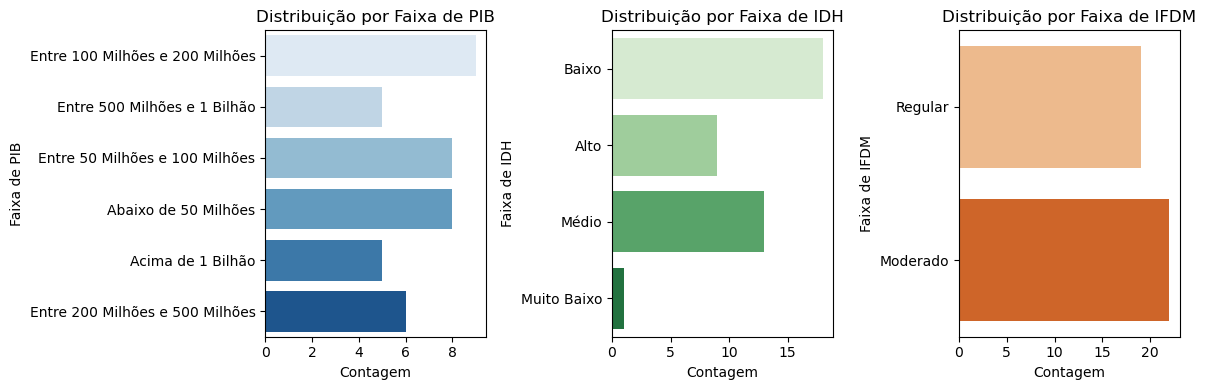

In [218]:
# Plot 1 - Distribuição dos municípios por Faixa de PIB
plt.figure(figsize=(12, 4))

# Gráfico de distribuição por Faixa de PIB
plt.subplot(1, 3, 1)
sns.countplot(y='Faixa_PIB', hue='Faixa_PIB', data=df, palette='Blues', legend=False)
plt.title('Distribuição por Faixa de PIB')
plt.xlabel('Contagem')
plt.ylabel('Faixa de PIB')

# Gráfico de distribuição por Faixa de IDH
plt.subplot(1, 3, 2)
sns.countplot(y='Faixa_IDH', hue='Faixa_IDH', data=df, palette='Greens', legend=False)
plt.title('Distribuição por Faixa de IDH')
plt.xlabel('Contagem')
plt.ylabel('Faixa de IDH')

# Gráfico de distribuição por Faixa de IFDM
plt.subplot(1, 3, 3)
sns.countplot(y='Faixa_IFDM', hue='Faixa_IFDM', data=df, palette='Oranges', legend=False)
plt.title('Distribuição por Faixa de IFDM')
plt.xlabel('Contagem')
plt.ylabel('Faixa de IFDM')

plt.tight_layout()
plt.show()


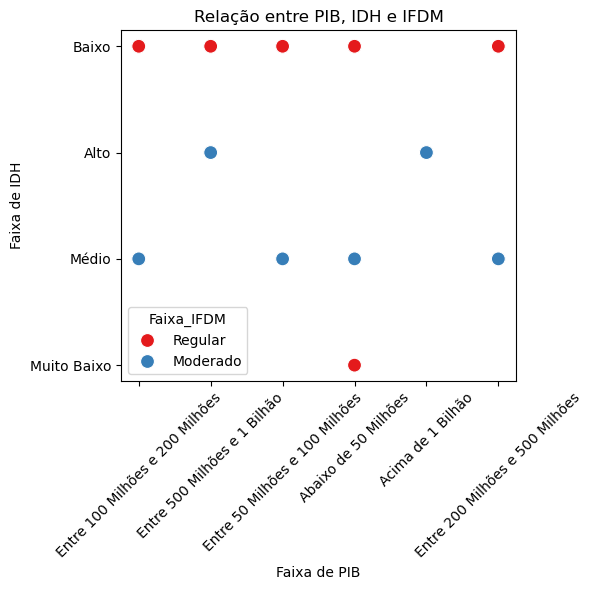

In [216]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Faixa_PIB', y='Faixa_IDH', data=df, hue='Faixa_IFDM', palette='Set1', s=100)
plt.title('Relação entre PIB, IDH e IFDM')
plt.xlabel('Faixa de PIB')
plt.ylabel('Faixa de IDH')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()